In [1]:
import torch
import matplotlib.pyplot as plt

In [24]:
N_SAMPLES = 20
N_HIDDEN = 300
LR = 0.01

In [12]:
# training data
x = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES), 1)
y = x + 0.7*torch.normal(torch.zeros(N_SAMPLES, 1), torch.ones(N_SAMPLES, 1))  # (means=0, std=1)

# test data
test_x = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES), 1)
test_y = test_x + 0.7*torch.normal(torch.zeros(N_SAMPLES, 1), torch.ones(N_SAMPLES, 1))  # (means=0, std=1)

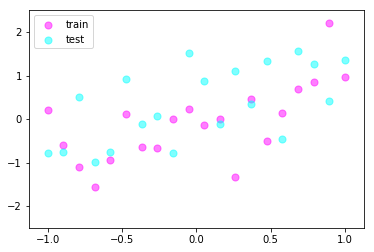

In [13]:
# show data
plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, alpha=0.5, label='train')
plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='cyan', s=50, alpha=0.5, label='test')
plt.legend(loc='upper left')
plt.ylim((-2.5, 2.5))
plt.show()

In [19]:
net_overfit = torch.nn.Sequential(
    torch.nn.Linear(1, N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, 1),
)

In [20]:
print(net_overfit)

Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=300, bias=True)
  (3): ReLU()
  (4): Linear(in_features=300, out_features=1, bias=True)
)


In [21]:
net_dropout = torch.nn.Sequential(
    torch.nn.Linear(1, N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(N_HIDDEN, N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(N_HIDDEN, 1),
)

In [22]:
print(net_dropout)

Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.5)
  (3): Linear(in_features=300, out_features=300, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.5)
  (6): Linear(in_features=300, out_features=1, bias=True)
)


In [28]:
optimizer_overfit = torch.optim.Adam(net_overfit.parameters(), lr=LR)
optimizer_dropout = torch.optim.Adam(net_dropout.parameters(), lr=LR)
loss_func = torch.nn.MSELoss()

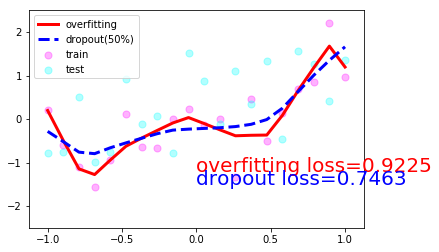

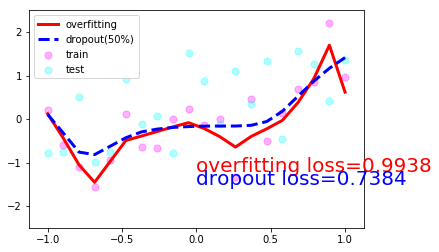

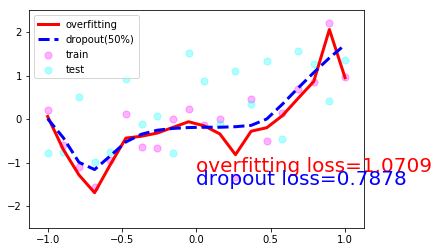

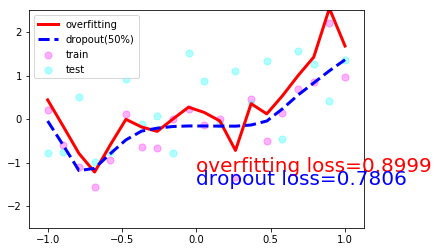

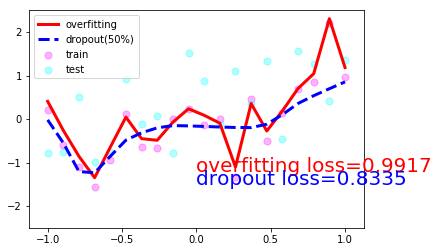

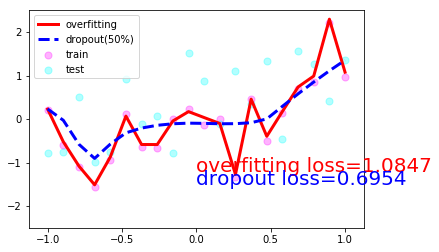

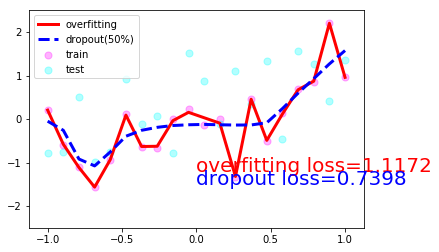

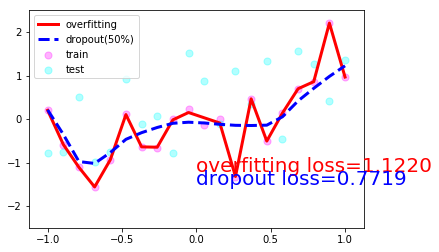

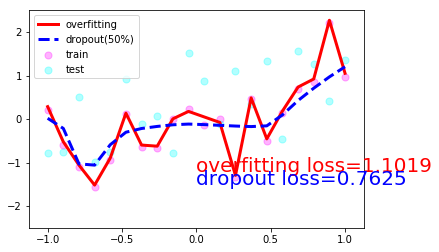

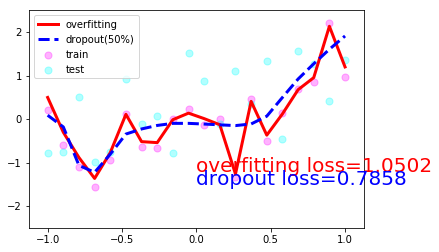

In [30]:
plt.ion()

for t in range(1000):
    pred_overfit = net_overfit(x)
    pred_dropout = net_dropout(x)
    loss_overfit = loss_func(pred_overfit, y)
    loss_dropout = loss_func(pred_dropout, y)

    optimizer_overfit.zero_grad()
    optimizer_dropout.zero_grad()
    loss_overfit.backward()
    loss_dropout.backward()
    optimizer_overfit.step()
    optimizer_dropout.step()

    if t % 100 == 0:
        # change to eval mode in order to ignore dropout
        net_overfit.eval()
        net_dropout.eval()

        # plotting
        test_pred_overfit = net_overfit(test_x)
        test_pred_dropout = net_dropout(test_x)
        
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, alpha=0.3, label='train')
        plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='cyan', s=50, alpha=0.3, label='test')
        plt.plot(test_x.data.numpy(), test_pred_overfit.data.numpy(), 'r-', lw=3, label='overfitting')
        plt.plot(test_x.data.numpy(), test_pred_dropout.data.numpy(), 'b--', lw=3, label='dropout(50%)')
        plt.text(0, -1.2, 'overfitting loss=%.4f' % loss_func(test_pred_overfit, test_y).data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.text(0, -1.5, 'dropout loss=%.4f' % loss_func(test_pred_dropout, test_y).data.numpy(), fontdict={'size': 20, 'color': 'blue'})
        plt.legend(loc='upper left'); plt.ylim((-2.5, 2.5));plt.pause(0.1)

        # change back to train mode
        net_overfit.train()
        net_dropout.train()

plt.ioff()